In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
#Load and preview data
df = pd.read_csv('AIML Dataset.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

Dataset loaded successfully!
Shape: (6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# Basic exploration
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (6362620, 11)

Column Names:
['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

First 5 rows:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             

In [7]:
## Step 2: Data Quality Assessment
# Check for missing values

print("="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})

print(missing_data.to_string(index=False))
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

MISSING VALUES ANALYSIS
        Column  Missing_Count  Missing_Percentage
          step              0                 0.0
          type              0                 0.0
        amount              0                 0.0
      nameOrig              0                 0.0
 oldbalanceOrg              0                 0.0
newbalanceOrig              0                 0.0
      nameDest              0                 0.0
oldbalanceDest              0                 0.0
newbalanceDest              0                 0.0
       isFraud              0                 0.0
isFlaggedFraud              0                 0.0

Total missing values: 0


In [9]:
# Check for duplicate records
print("="*80)
print("DUPLICATE RECORDS")
print("="*80)

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates:,}")
print(f"Percentage of duplicates: {(duplicates/len(df))*100:.4f}%")

DUPLICATE RECORDS
Number of duplicate rows: 0
Percentage of duplicates: 0.0000%


In [10]:
# Check data types
print("="*80)
print("DATA TYPES")
print("="*80)
print(df.dtypes)
print(f"\n")
df.info()

DATA TYPES
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
# Check unique values per column
print("="*80)
print("UNIQUE VALUES PER COLUMN")
print("="*80)

for col in df.columns:
    print(f"{col:20s}: {df[col].nunique():>15,} unique values")

UNIQUE VALUES PER COLUMN
step                :             743 unique values
type                :               5 unique values
amount              :       5,316,900 unique values
nameOrig            :       6,353,307 unique values
oldbalanceOrg       :       1,845,844 unique values
newbalanceOrig      :       2,682,586 unique values
nameDest            :       2,722,362 unique values
oldbalanceDest      :       3,614,697 unique values
newbalanceDest      :       3,555,499 unique values
isFraud             :               2 unique values
isFlaggedFraud      :               2 unique values


Fraud Distribution:
isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

Fraud Percentage: 0.0003%


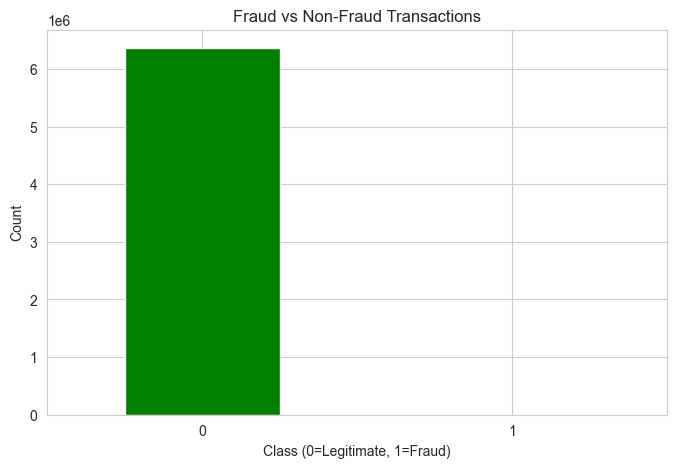

In [ ]:
# Check fraud distribution
print("Fraud Distribution:")
print(df['isFlaggedFraud'].value_counts())
print(f"\nFraud Percentage: {df['isFlaggedFraud'].mean() * 100:.4f}%")

# Visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
df['isFlaggedFraud'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Class (0=Legitimate, 1=Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Fraud Distribution:
isFraud
0    6354407
1       8213
Name: count, dtype: int64

Fraud Percentage: 0.1291%


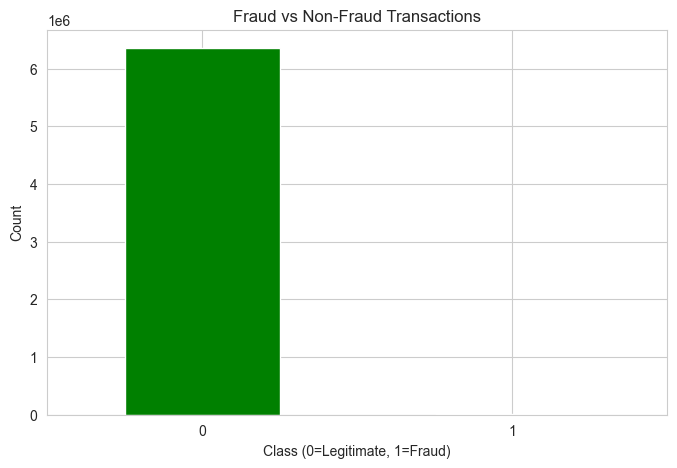

In [ ]:
# Check fraud distribution
print("Fraud Distribution:")
print(df['isFraud'].value_counts())
print(f"\nFraud Percentage: {df['isFraud'].mean() * 100:.4f}%")

# Visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
df['isFraud'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Class (0=Legitimate, 1=Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Transaction Types:
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

Fraud by Transaction Type:
type
TRANSFER    16
CASH_IN      0
CASH_OUT     0
DEBIT        0
PAYMENT      0
Name: isFlaggedFraud, dtype: int64


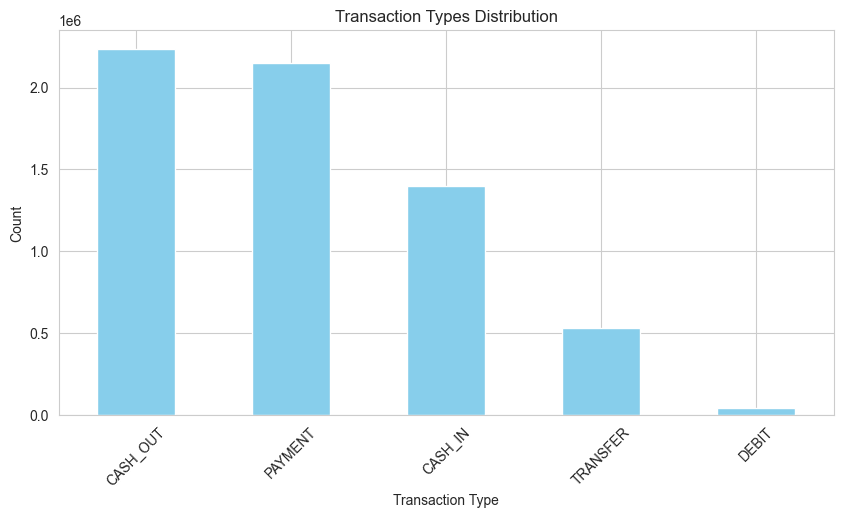

In [ ]:
#Transaction type analysis
print("Transaction Types:")
print(df['type'].value_counts())

# Fraud by transaction type
print("\nFraud by Transaction Type:")
fraud_by_type = df.groupby('type')['isFlaggedFraud'].sum().sort_values(ascending=False)
print(fraud_by_type)

# Visualize
plt.figure(figsize=(10, 5))
df['type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Transaction Types Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Amount Statistics:
count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

Fraud vs Non-Fraud Amount Comparison:
                    count          mean           std        min  \
isFlaggedFraud                                                     
0               6362604.0  1.798501e+05  6.037884e+05       0.00   
1                    16.0  4.861598e+06  3.572499e+06  353874.22   

                         25%          50%           75%          max  
isFlaggedFraud                                                        
0               1.338955e+04    74871.270  2.087205e+05  92445516.64  
1               2.242749e+06  4234245.095  7.883451e+06  10000000.00  


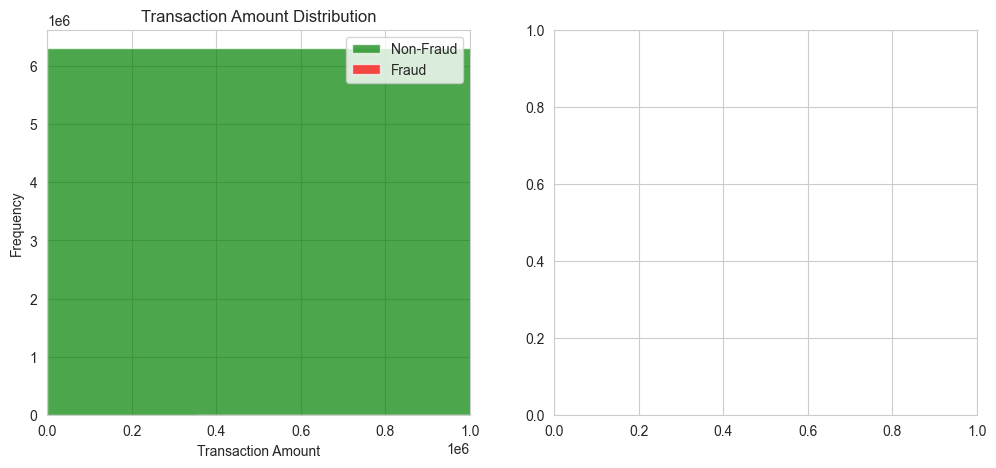

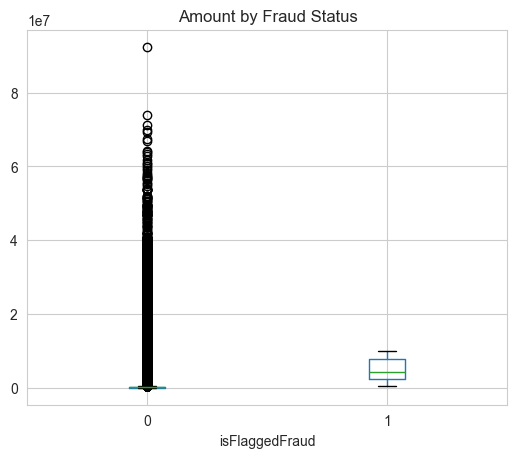

In [17]:
#Amount analysis
print("Amount Statistics:")
print(df['amount'].describe())

# Compare fraud vs non-fraud amounts
print("\nFraud vs Non-Fraud Amount Comparison:")
print(df.groupby('isFlaggedFraud')['amount'].describe())

# Visualize
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df[df['isFlaggedFraud']==0]['amount'].hist(bins=50, alpha=0.7, label='Non-Fraud', color='green')
df[df['isFlaggedFraud']==1]['amount'].hist(bins=50, alpha=0.7, label='Fraud', color='red')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Transaction Amount Distribution')
plt.legend()
plt.xlim(0, 1000000)

plt.subplot(1, 2, 2)
df.boxplot(column='amount', by='isFlaggedFraud', figsize=(6, 5))
plt.title('Amount by Fraud Status')
plt.suptitle('')
plt.show()